# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

coef respectively for aproximation: [2.60613919 7.9998888 ], [8.64736560e-03 2.17377090e+00 1.15665634e+01], [ 3.23884393e-04 -1.56439637e-02  2.65716034e+00  9.60321461e+00]


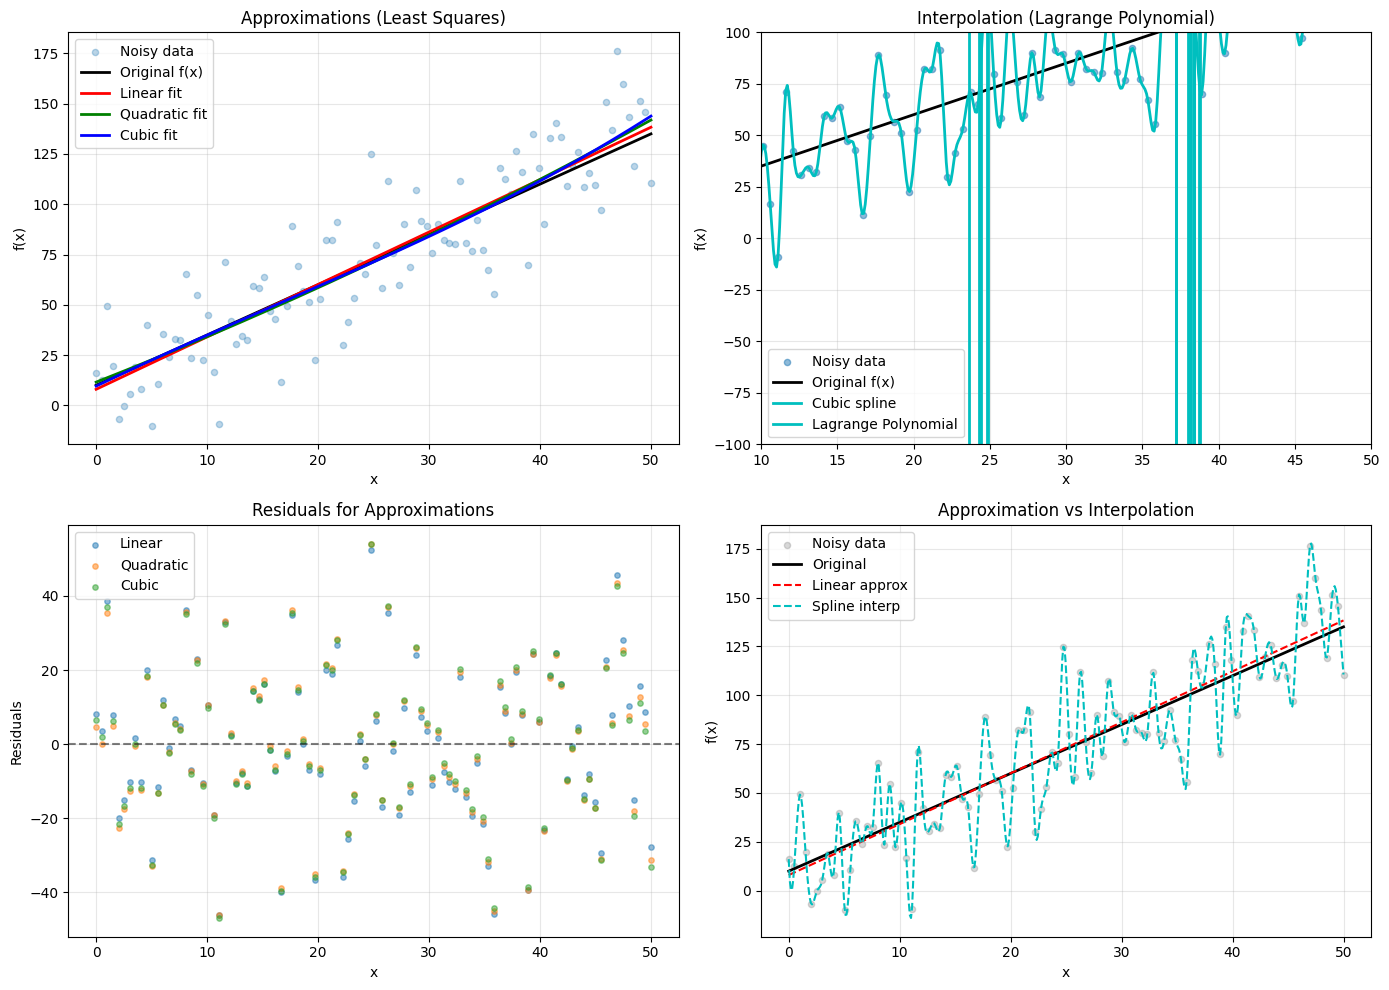

In [204]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange, interp1d
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

num_of_probek = 100
def f(x):
    a, b = 2.5, 10
    return a * x + b

def linear_model(x, a, b):
    return a * x + b
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c
def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

x_data = np.linspace(0, 50, num_of_probek)
y_data = f(x_data)
noise = np.random.normal(0.1, 20, num_of_probek)
y_data_noisy = y_data + noise
#print(y_data_noisy)

# aproximation
params_linear, _ = curve_fit(linear_model, x_data, y_data_noisy)
params_quad, _ = curve_fit(quadratic_model, x_data, y_data_noisy)
params_cubic, _ = curve_fit(cubic_model, x_data, y_data_noisy)

print(f"coef respectively for aproximation: {params_linear}, {params_quad}, {params_cubic}")

# plotting
x_plot = np.linspace(0, 50, 500)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# plot 1: approximations
axes[0, 0].scatter(x_data, y_data_noisy, alpha=0.3, s=20, label='Noisy data')
axes[0, 0].plot(x_plot, f(x_plot), 'k-', linewidth=2, label='Original f(x)')
axes[0, 0].plot(x_plot, linear_model(x_plot, *params_linear), 'r-', linewidth=2, label='Linear fit')
axes[0, 0].plot(x_plot, quadratic_model(x_plot, *params_quad), 'g-', linewidth=2, label='Quadratic fit')
axes[0, 0].plot(x_plot, cubic_model(x_plot, *params_cubic), 'b-', linewidth=2, label='Cubic fit')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].set_title('Approximations (Least Squares)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# plot 2: interpolation
poly_lagrange = lagrange(x_data, y_data_noisy)
spline = interp1d(x_data, y_data_noisy, kind='cubic')# sklejone 3 stopnia

axes[0, 1].scatter(x_data, y_data_noisy, alpha=0.5, s=20, label='Noisy data')
axes[0, 1].plot(x_plot, f(x_plot), 'k-', linewidth=2, label='Original f(x)')
axes[0, 1].plot(x_plot, spline(x_plot), 'c-', linewidth=2, label='Cubic spline')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].set_title('Interpolation (Cubic Spline)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].plot(x_plot, poly_lagrange(x_plot), 'c-', linewidth=2, label='Lagrange Polynomial')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].set_title('Interpolation (Lagrange Polynomial)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xlim(10, 50)
axes[0, 1].set_ylim(-100, 100)

# residuals
axes[1, 0].scatter(x_data, y_data_noisy - linear_model(x_data, *params_linear), alpha=0.5, s=15, label='Linear')
axes[1, 0].scatter(x_data, y_data_noisy - quadratic_model(x_data, *params_quad), alpha=0.5, s=15, label='Quadratic')
axes[1, 0].scatter(x_data, y_data_noisy - cubic_model(x_data, *params_cubic), alpha=0.5, s=15, label='Cubic')
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals for Approximations')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# comparison of all methods
axes[1, 1].scatter(x_data, y_data_noisy, alpha=0.3, s=20, label='Noisy data', color='gray')
axes[1, 1].plot(x_plot, f(x_plot), 'k-', linewidth=2, label='Original')
axes[1, 1].plot(x_plot, linear_model(x_plot, *params_linear), 'r--', linewidth=1.5, label='Linear approx')
axes[1, 1].plot(x_plot, spline(x_plot), 'c--', linewidth=1.5, label='Spline interp')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].set_title('Approximation vs Interpolation')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

LINEAR    : t = 2.3929 s, v = 30.80 m/s (110.88 km/h), 2 iter
Time when driver passed the radar: 2.3929 s.
btw converged in: 2 iter.
and speed at radar was: 2.50 m/s = 9.00 km/h
QUADRATIC : t = 2.2672 s, v = 21.82 m/s (78.56 km/h), 6 iter
Time when driver passed the radar: 2.2672 s.
btw converged in: 6 iter.
and speed at radar was: 2.50 m/s = 9.00 km/h
CUBIC     : t = 2.2758 s, v = 21.68 m/s (78.05 km/h), 6 iter
Time when driver passed the radar: 2.2758 s.
btw converged in: 6 iter.
and speed at radar was: 2.50 m/s = 9.00 km/h


/var/folders/7s/t0qpdl0d791b5cs1mb_7cpc00000gn/T/ipykernel_91450/1923374396.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model, t, s)


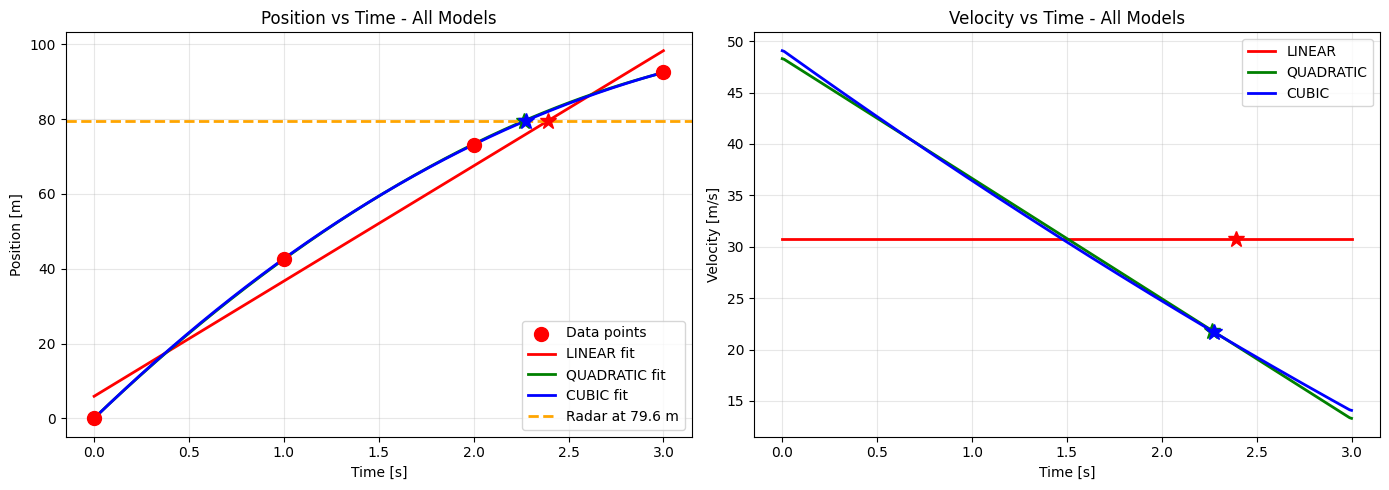

In [205]:
def sieczne(f, x0, x1, tol=1e-7, max_iter=1000): # copied from lab3
    for iteration in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        
        if abs(fx1 - fx0) < 1e-15:
            raise ValueError(f"f(x1) - f(x0) zbyt blisko zera: f({x0}) = {fx0}, f({x1}) = {fx1}")
        
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        if abs(fx1) < tol or abs(x_new - x1) < tol:
            return x_new, iteration + 1
        
        x0, x1 = x1, x_new
    
    return x1, max_iter

t = np.array([0.0, 1.0, 2.0, 3.0]) # getting data
s = np.array([0.0, 42.7, 73.2, 92.5])
radar_pos = 79.6

#f = interp1d(t, s, kind='cubic') # function of pos over time 
# zamiast tego robimy aproximation:
models = {
    'LINEAR' : (linear_model, None),
    'QUADRATIC' : (quadratic_model, None),
    'CUBIC' : (cubic_model, None)
}

results = {}
for name, (model, _) in models.items():
    params, _ = curve_fit(model, t, s)    

    pos = lambda time, p=params, m=model: m(time, *p)
    t_radar, iterations = sieczne(lambda time: pos(time) - radar_pos, 2.0, 3.0)
    
    dt = 0.001
    v = (pos(t_radar + dt) - pos(t_radar - dt)) / (2 * dt)
    
    results[name] = {'time': t_radar, 'velocity': v, 'iterations': iterations, 'pos_func': pos}
    print(f"{name:10s}: t = {t_radar:.4f} s, v = {v:.2f} m/s ({v*3.6:.2f} km/h), {iterations} iter")

    print(f"Time when driver passed the radar: {t_radar:.4f} s.")
    print(f"btw converged in: {iterations} iter.")

    # calculating speed at that moment
    # v(t) = ds/dt - so we can approximate using numerical derivative
    dt = 0.001
    v = (f(t_radar + dt) - f(t_radar - dt)) / (2 * dt) # central difference

    print(f"and speed at radar was: {v:.2f} m/s = {v * 3.6:.2f} km/h")


# visualization
t_plot = np.linspace(0, 3, 300)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

colors = {'LINEAR': 'r', 'QUADRATIC': 'g', 'CUBIC': 'b'}
ax1.scatter(t, s, color='red', s=100, zorder=5, label='Data points')
for name, result in results.items():
    ax1.plot(t_plot, result['pos_func'](t_plot), color=colors[name], 
             linewidth=2, label=f"{name} fit")
    ax1.plot(result['time'], radar_pos, color=colors[name], marker='*', 
             markersize=12, zorder=4)

ax1.axhline(y=radar_pos, color='orange', linestyle='--', linewidth=2, label=f'Radar at {radar_pos} m')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Position [m]')
ax1.set_title('Position vs Time - All Models')
ax1.legend()
ax1.grid(alpha=0.3)

# Velocity plot
for name, result in results.items():
    velocities = np.gradient(result['pos_func'](t_plot), t_plot)
    ax2.plot(t_plot, velocities, color=colors[name], linewidth=2, label=name)
    ax2.plot(result['time'], result['velocity'], color=colors[name], 
             marker='*', markersize=12)

ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Velocity [m/s]')
ax2.set_title('Velocity vs Time - All Models')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/datasets/)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [206]:
# i will use wine quality dataset
# lets actually do full eda, visualization etc.
df = pd.read_csv('winequality-red.csv', sep=';') # reading
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [207]:
df.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


### EDA

/var/folders/7s/t0qpdl0d791b5cs1mb_7cpc00000gn/T/ipykernel_91450/3538263569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


<Axes: xlabel='quality', ylabel='count'>

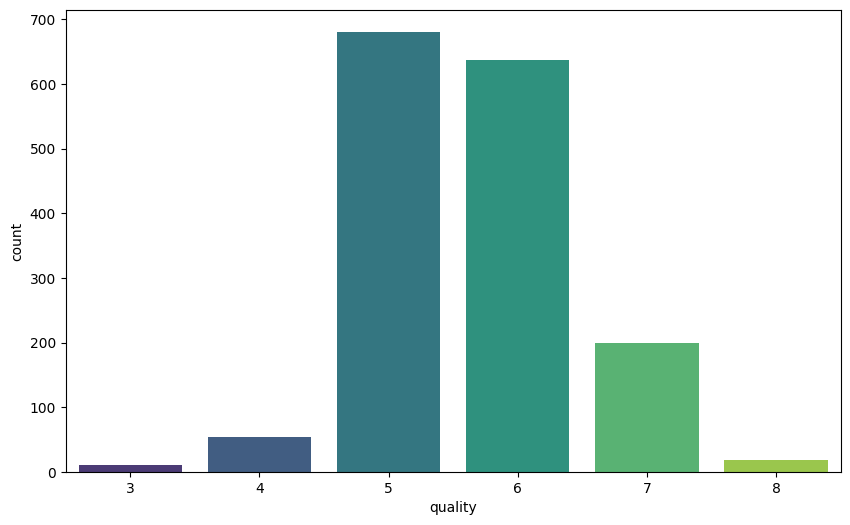

In [208]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')

Lets chekc corr

In [209]:
df.corr().style.background_gradient(cmap='viridis')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

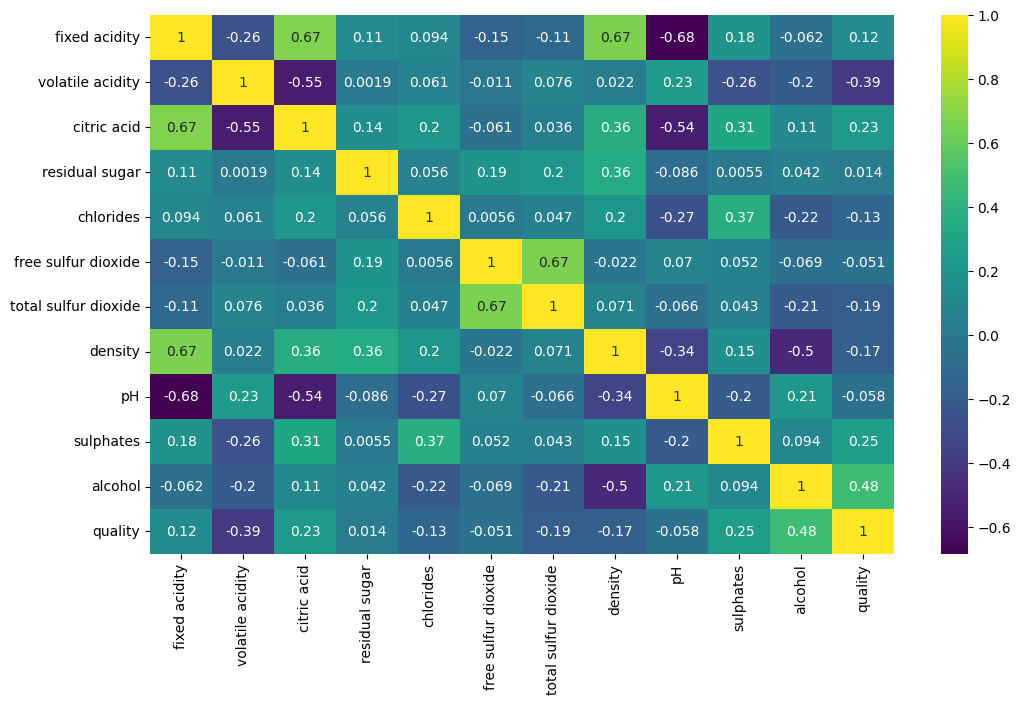

In [210]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

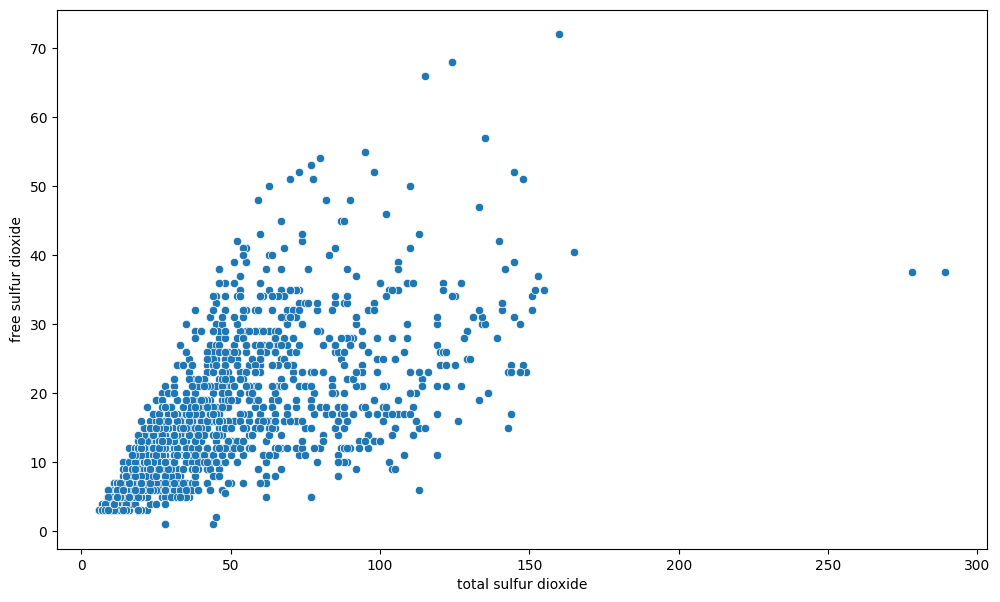

In [211]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

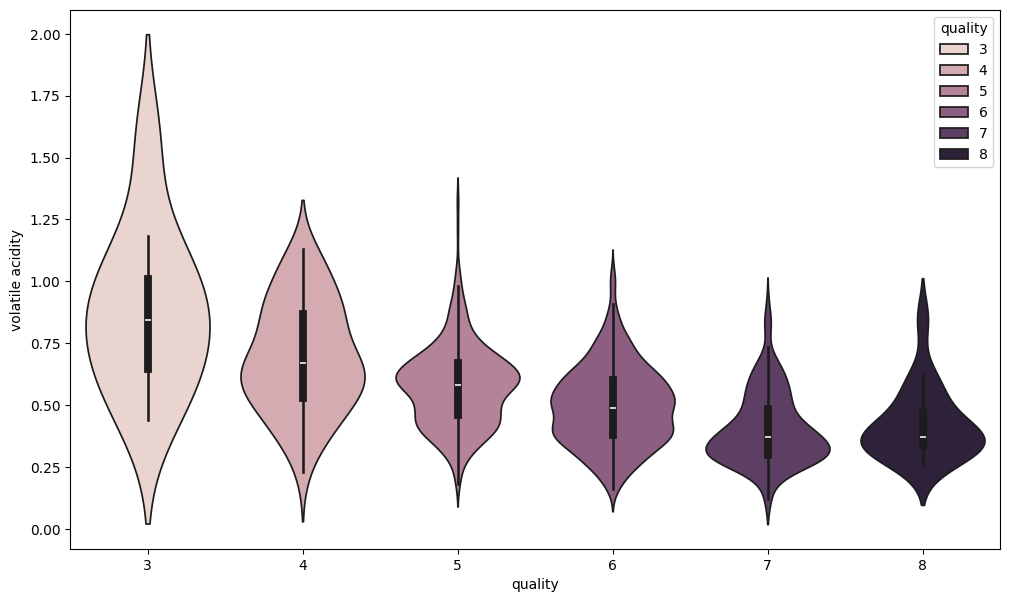

In [212]:
plt.figure(figsize=(12,7))
sns.violinplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

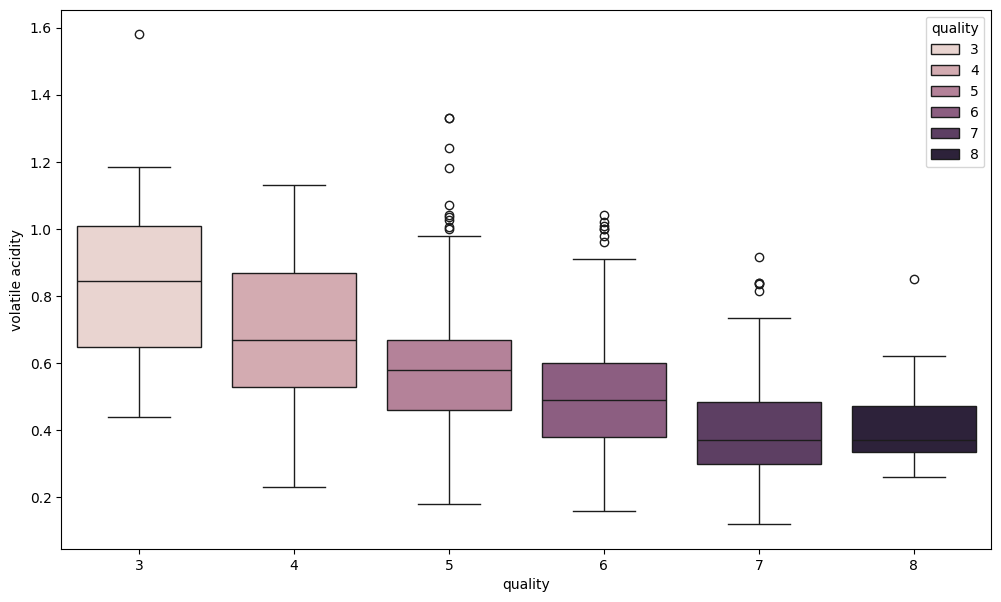

In [213]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

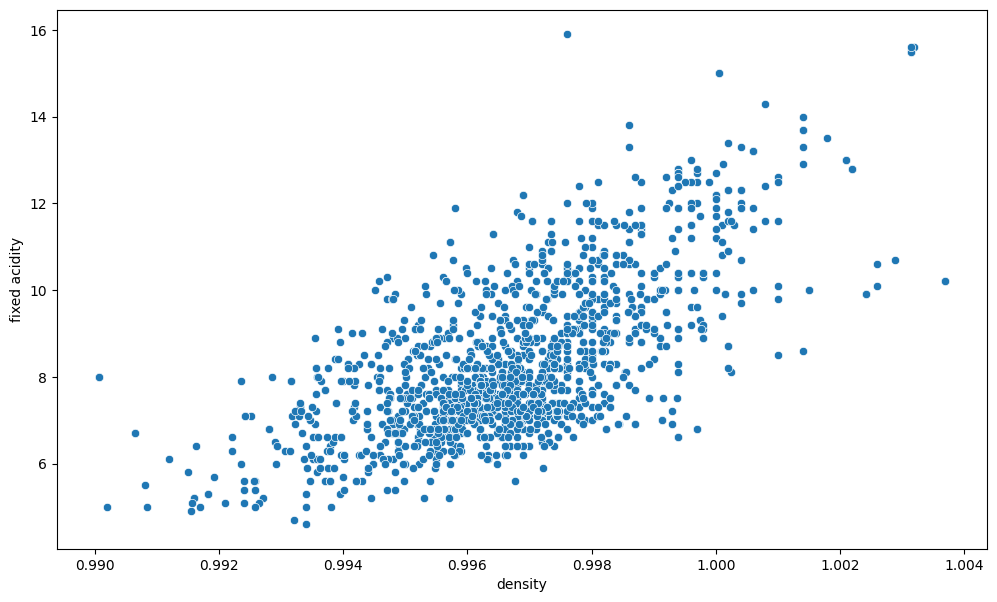

In [214]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

In [215]:
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

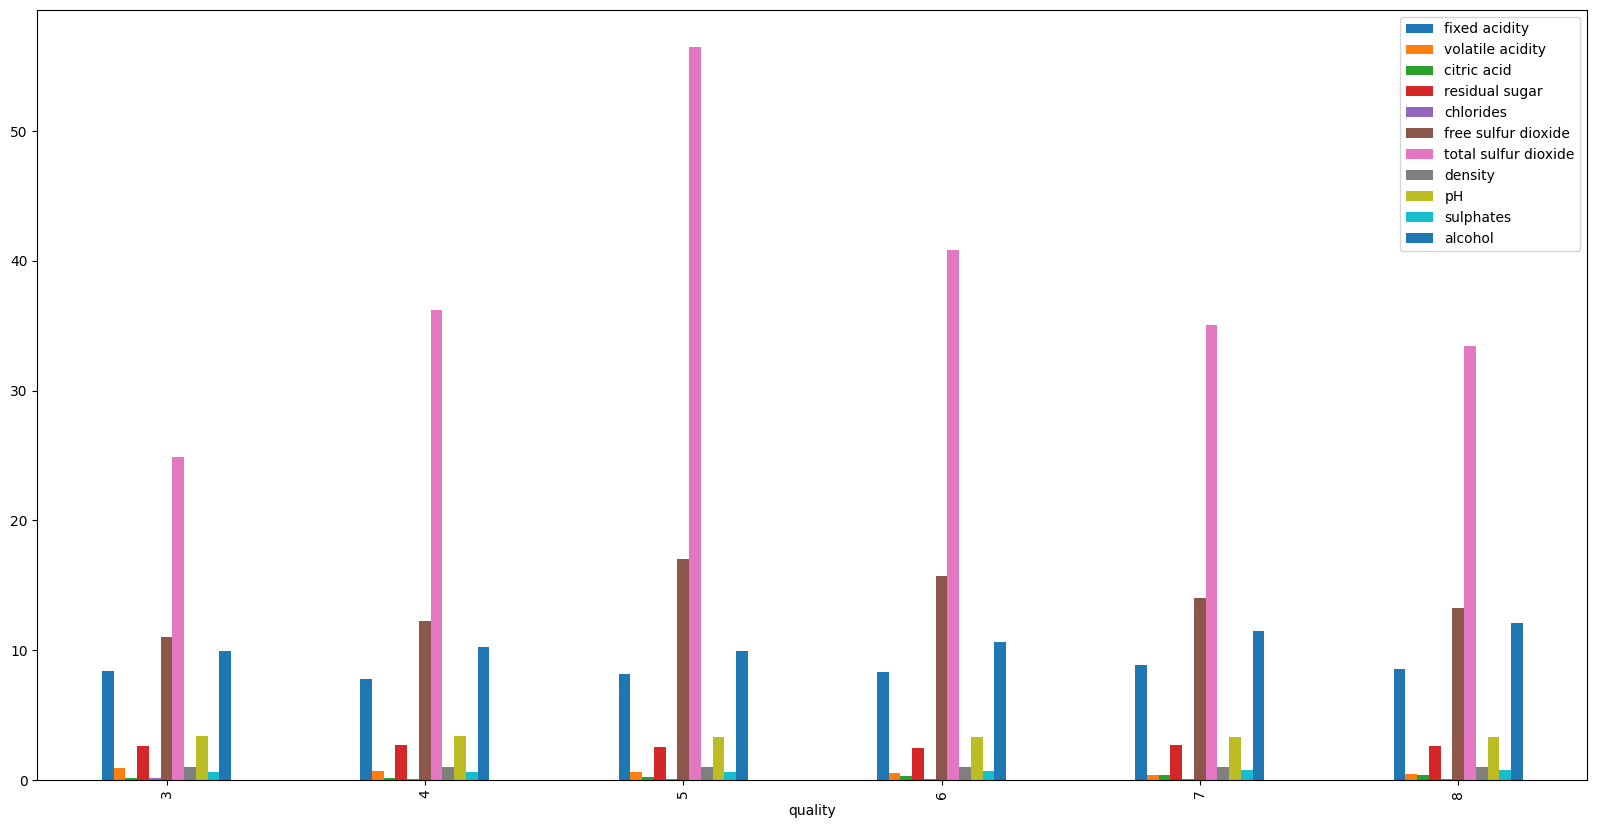

In [216]:
ave_qu.plot(kind="bar",figsize=(20,10))

like who tf determines quality, i mean 7 almost equals 8. maybe combinations matter

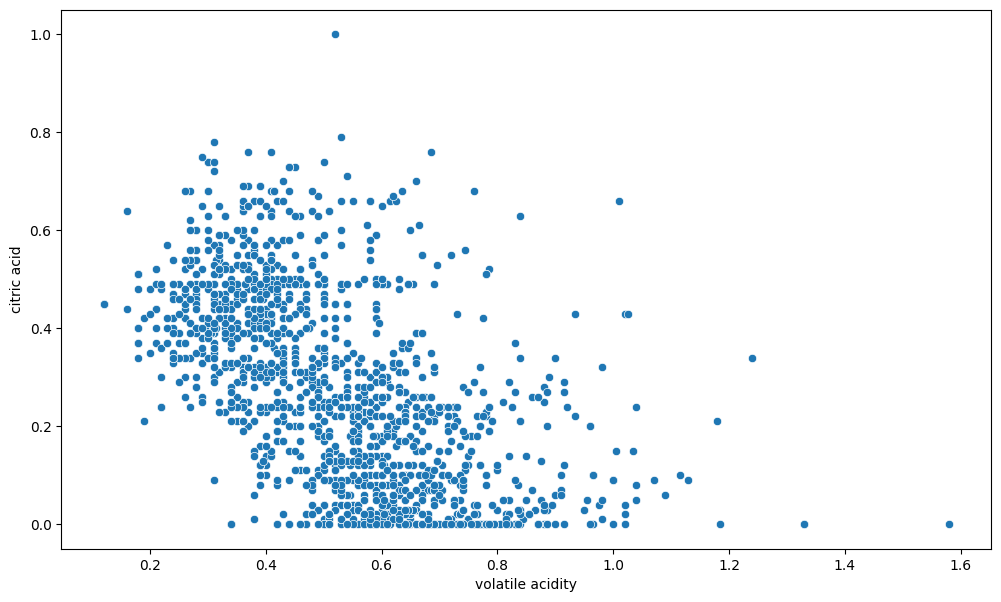

In [217]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

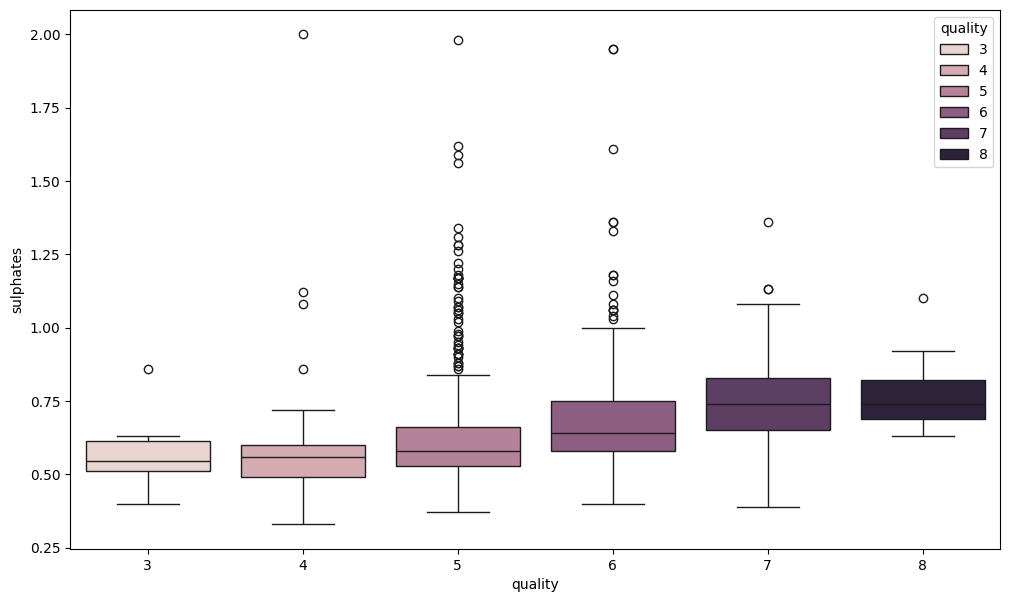

In [218]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

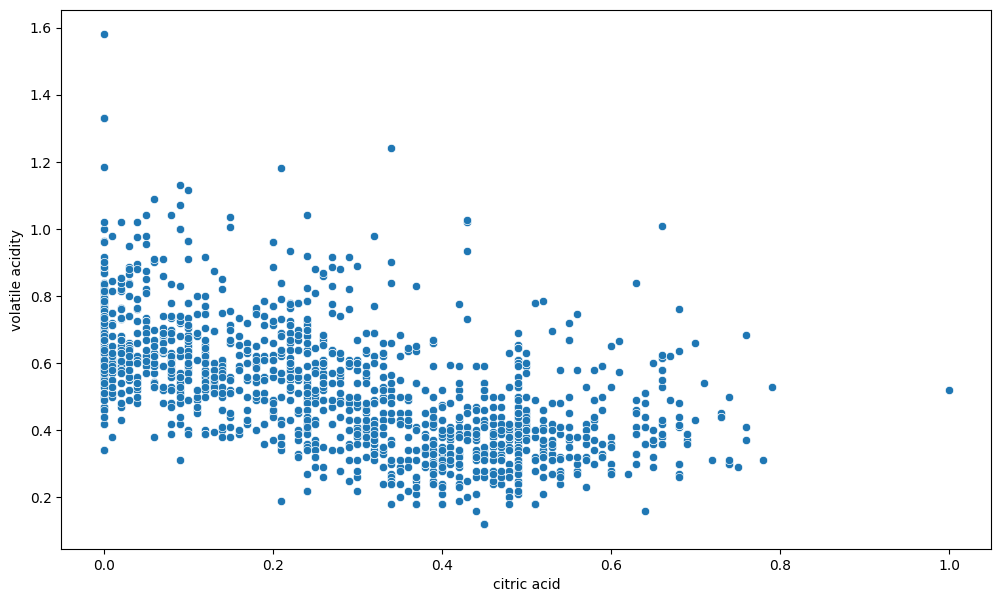

In [219]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [220]:
# normalizing
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,5
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,5
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,6
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5


In [221]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0) # 80/20

In [222]:
model_comp={}

In [223]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(f"accuracy_score: {accuracy_score(ytest,y1)}")
print(f"f1_score: {f1_score(ytest,y1,average='weighted')}")
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(ytest,y1),f1_score(ytest,y1,average='weighted')]

accuracy_score: 0.625
f1_score: 0.5931778739355794
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.77      0.70       135
           6       0.62      0.65      0.64       142
           7       0.33      0.11      0.17        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.58      0.62      0.59       320



/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [224]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(f"ac_sc :{accuracy_score(ytest,y3)}")
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(ytest,y3),f1_score(ytest,y3,average='weighted')]

ac_sc :0.721875
0.7052523362693893
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.75      0.83      0.79       135
           6       0.74      0.73      0.74       142
           7       0.52      0.56      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.69      0.72      0.71       320



/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [225]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(f"accuracy_score: {accuracy_score(ytest,y4)}")
print(f"f1_score: {f1_score(ytest,y4,average='weighted')}")
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(ytest,y4),f1_score(ytest,y4,average='weighted')]

accuracy_score: 0.625
f1_score: 0.6101330372686371
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       135
           6       0.63      0.62      0.63       142
           7       0.46      0.44      0.45        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.60      0.62      0.61       320



/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [226]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(ytest,y5),f1_score(ytest,y5,average='weighted')]

0.65
0.6024744814931203
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.81      0.73       135
           6       0.63      0.70      0.66       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.22      0.25      0.23       320
weighted avg       0.56      0.65      0.60       320



/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

## linear, rounded to classification

In [227]:
LR_model=LinearRegression()
LR_model.fit(xtrain,ytrain)
y6=LR_model.predict(xtest)

print("Score the X-train with Y-train is : ", LR_model.score(xtrain,ytrain))
print("Score the X-test  with Y-test  is : ", LR_model.score(xtest,ytest))

y_pred_LR=LR_model.predict(xtest)

print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(ytest,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(ytest,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(ytest,y_pred_LR)) 

print(accuracy_score(ytest,np.round(y6).astype(int)))
print(f1_score(ytest,np.round(y6).astype(int),average='weighted'))
print(classification_report(ytest,np.round(y6).astype(int)))

model_comp['linear']=[accuracy_score(ytest,np.round(y6).astype(int)),f1_score(ytest,np.round(y6).astype(int),average='weighted')]

Score the X-train with Y-train is :  0.36545196162068616
Score the X-test  with Y-test  is :  0.3283887639580034
 Model Evaluation Linear R : mean absolute error is  0.46963309286612587
 Model Evaluation Linear R : mean squared  error is  0.3844711978201351
 Model Evaluation Linear R : median absolute error is  0.3563168953300071
0.63125
0.6089191132702864
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.72      0.70       135
           6       0.61      0.69      0.65       142
           7       0.44      0.26      0.33        27
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.59      0.63      0.61       320



/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niyazlapkovskii/Developer/met_num/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [228]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
logistic regression,0.625000,0.593178
svc,0.650000,0.602474
linear,0.631250,0.608919
KNN,0.625000,0.610133
Random forest,0.721875,0.705252


In [229]:
# smth like that